In [358]:
import numpy as np

from src.lfk_slow import *
import networkx as nx
from networkx.generators.community import LFR_benchmark_graph
from src.graphs import draw_graph, random_graph

In [12]:
%reload_ext autoreload
%autoreload 2

# Test on a simple graph

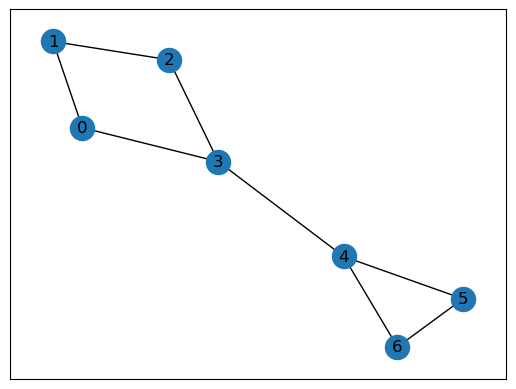

In [16]:
X = np.array([
    [0, 1, 0, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [1, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 1, 1, 0],
])


nx.draw_networkx(nx.from_numpy_array(X))

In [17]:
natural_community(X, 0)

array([ True,  True,  True,  True, False, False, False])

In [19]:
lfk(X)

[array([False, False, False, False,  True,  True,  True]),
 array([ True,  True,  True,  True, False, False, False])]

# Test on bigger graphs

## SBM graphs

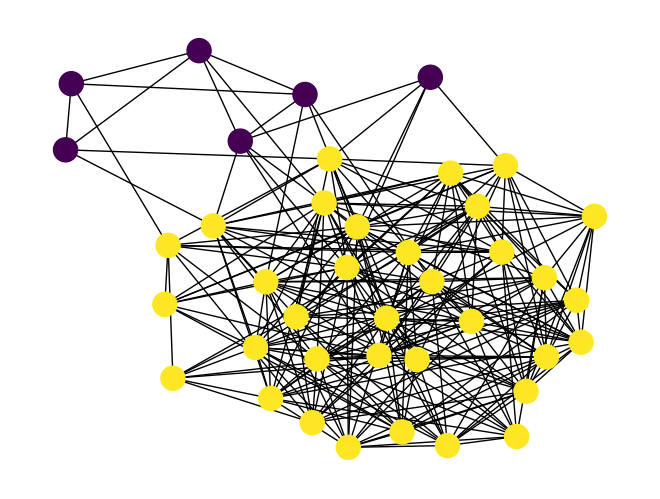

alpha:  [0.11521527 0.88478473]
pi:  [[0.37384232 0.0839902 ]
 [0.12615768 0.4160098 ]]


In [257]:
# Generate a random graph with SBM
Q = 2
n = 40
X, Z, alpha, pi = random_graph(n, Q)
draw_graph(X, Z)
print("alpha: ", alpha)
print("pi: ", pi)

In [258]:
def plot_overlapping_clustering(X, clusters):
    """ Nodes for the current cluster are colored in yellow, the others in purple. """
    for cluster in clusters:
        Z = np.zeros((X.shape[0], 2))
        Z[cluster, 1] = 1
        Z[~cluster, 0] = 1
        draw_graph(X, Z)

In [259]:
communities = lfk(X)

In [260]:
len(communities)

3

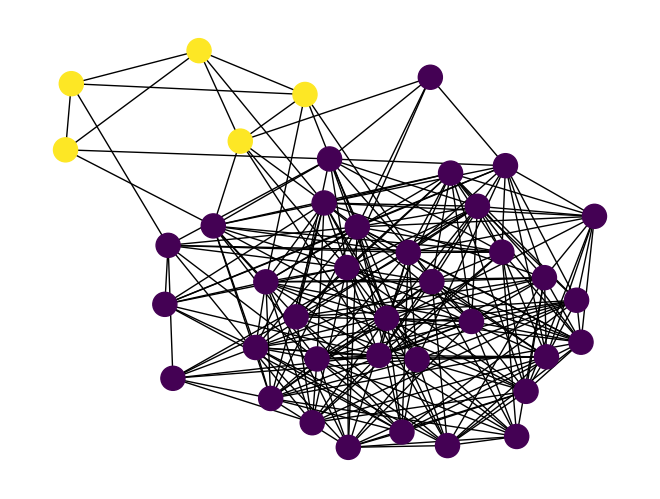

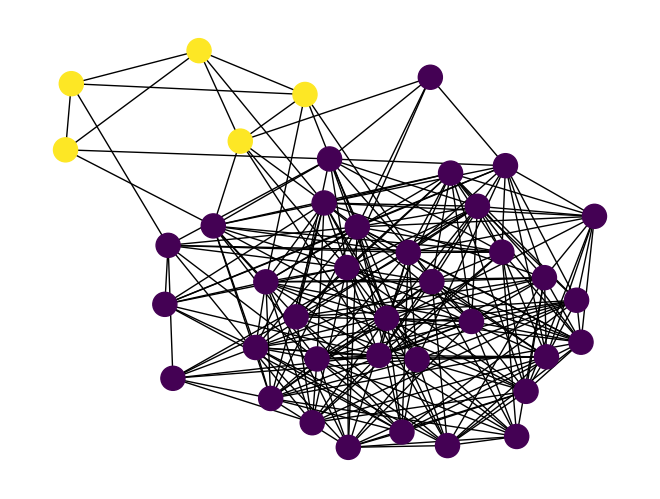

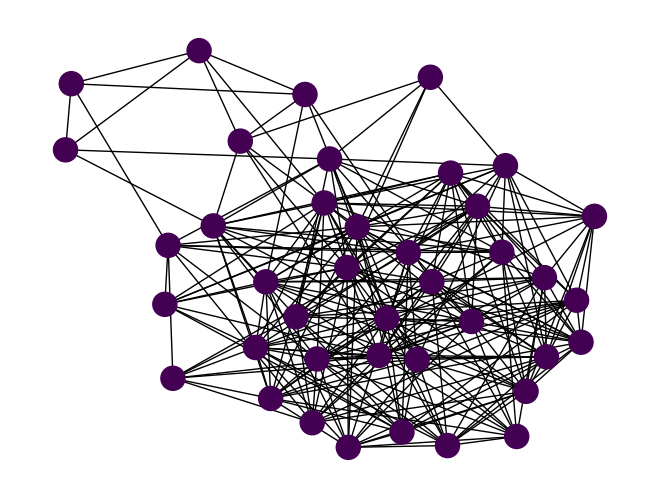

In [261]:
plot_overlapping_clustering(X, communities)

## Zachary's karate club

In [225]:
# Loads the karate network
G = nx.read_weighted_edgelist('./data/karate.edgelist', delimiter=' ', nodetype=int, create_using=nx.Graph())
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

n = G.number_of_nodes()

# Loads the class labels
class_labels = np.loadtxt('./data/karate_labels.txt', delimiter=',', dtype=np.int32)
idx_to_class_label = dict()
for i in range(class_labels.shape[0]):
    idx_to_class_label[class_labels[i,0]] = class_labels[i,1]

y = list()
for node in G.nodes():
    y.append(idx_to_class_label[node])

y = np.array(y)
X = nx.to_numpy_array(G)

Number of nodes: 34
Number of edges: 78


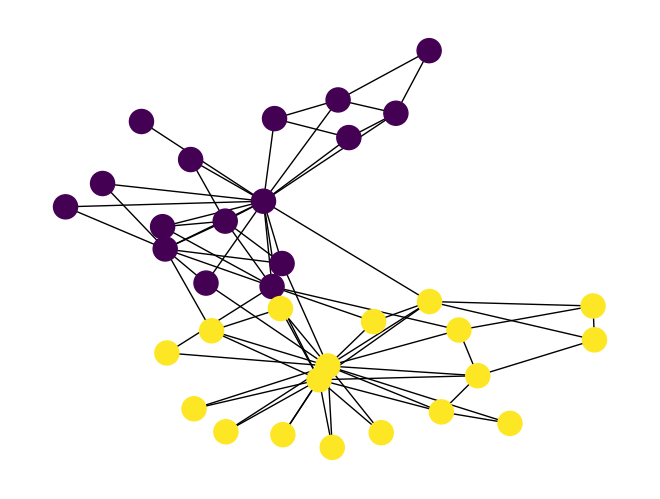

In [226]:
nx.draw(G, node_color=y)

In [244]:
communities = lfk(X, alpha=0.8)

Number of communities: 2


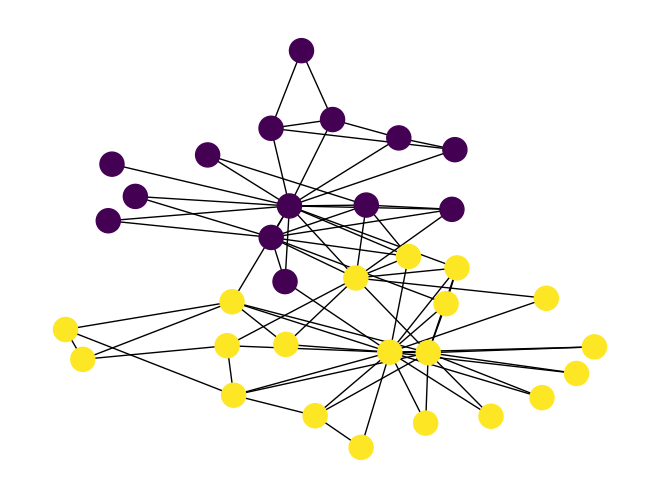

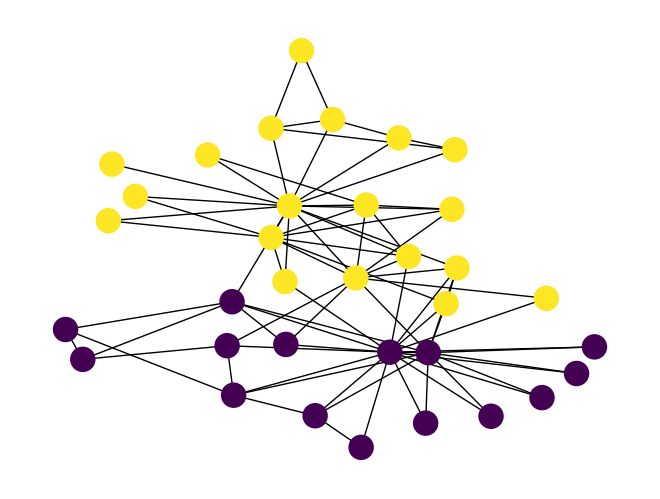

In [251]:
print("Number of communities:", len(communities))
plot_overlapping_clustering(X, communities)

# Test with LFR benchmark

In [396]:
G = LFR_benchmark_graph(n=100, tau1=2, tau2=1.5, mu=0.1, average_degree=5, min_community=40, max_community=50, seed=10)
G.remove_edges_from(nx.selfloop_edges(G))
# I need to learn how to tune this thing